In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [4]:
import tensorflow as tf
print(tf.__version__)


2.10.0


In [6]:
start = '2018-01-01'
end = '2023-2-8'

df = yf.download('ADANIENT.NS',  start, end)
df.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01 00:00:00+05:30,90.344620,92.551476,89.908699,90.480850,89.171822,7745247
2018-01-02 00:00:00+05:30,90.508095,91.216469,88.355736,89.309311,88.017235,4977129
2018-01-03 00:00:00+05:30,89.309311,98.218445,89.309311,96.011597,94.622551,39032205
2018-01-04 00:00:00+05:30,95.902618,100.915710,94.894547,99.880394,98.435379,22778210
2018-01-05 00:00:00+05:30,100.697746,105.874306,99.389984,105.247673,103.725014,21144683


In [7]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-01 00:00:00+05:30,2995.000000,3010.750000,1941.199951,2135.350098,2135.350098,13525314
2023-02-02 00:00:00+05:30,2348.850098,2348.850098,1494.750000,1565.250000,1565.250000,34474080
2023-02-03 00:00:00+05:30,1490.000000,1679.900024,1017.450012,1586.800049,1586.800049,43885579
2023-02-06 00:00:00+05:30,1575.000000,1615.000000,1435.199951,1572.699951,1572.699951,19308603
2023-02-07 00:00:00+05:30,1571.000000,1962.699951,1525.599976,1802.949951,1802.949951,19188072


In [8]:
df.to_csv('ADANIENT.csv')

In [6]:
df = df.reset_index()

In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-01 00:00:00+05:30,90.344620,92.551476,89.908699,90.480850,89.171829,7745247
1,2018-01-02 00:00:00+05:30,90.508095,91.216469,88.355736,89.309311,88.017235,4977129
2,2018-01-03 00:00:00+05:30,89.309311,98.218445,89.309311,96.011597,94.622559,39032205
3,2018-01-04 00:00:00+05:30,95.902618,100.915710,94.894547,99.880394,98.435387,22778210
4,2018-01-05 00:00:00+05:30,100.697746,105.874306,99.389984,105.247673,103.725006,21144683


In [8]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,90.344620,92.551476,89.908699,90.480850,7745247
1,90.508095,91.216469,88.355736,89.309311,4977129
2,89.309311,98.218445,89.309311,96.011597,39032205
3,95.902618,100.915710,94.894547,99.880394,22778210
4,100.697746,105.874306,99.389984,105.247673,21144683


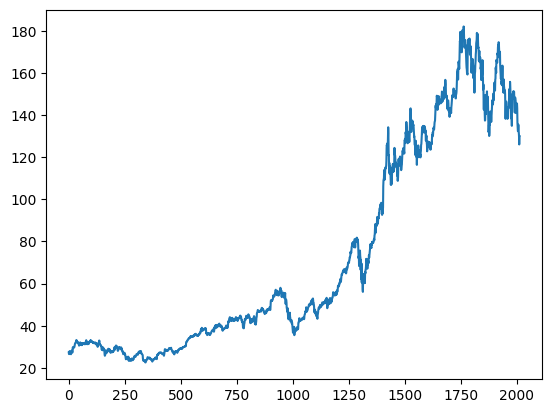

In [9]:
plt.plot(df.Close)

In [9]:
df

,Open,High,Low,Close,Volume
0,90.344620,92.551476,89.908699,90.480850,7745247
1,90.508095,91.216469,88.355736,89.309311,4977129
2,89.309311,98.218445,89.309311,96.011597,39032205
3,95.902618,100.915710,94.894547,99.880394,22778210
4,100.697746,105.874306,99.389984,105.247673,21144683
...,...,...,...,...,...
1257,2995.000000,3010.750000,1941.199951,2135.350098,13525314
1258,2348.850098,2348.850098,1494.750000,1565.250000,34474080
1259,1490.000000,1679.900024,1017.450012,1586.800049,43885579
1260,1575.000000,1615.000000,1435.199951,1572.699951,19308603


In [10]:
ma100 = df.Close.rolling(100).mean()
ma100

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
1257    3650.601504
1258    3631.742004
1259    3612.972004
1260    3593.141003
1261    3575.449502
Name: Close, Length: 1262, dtype: float64

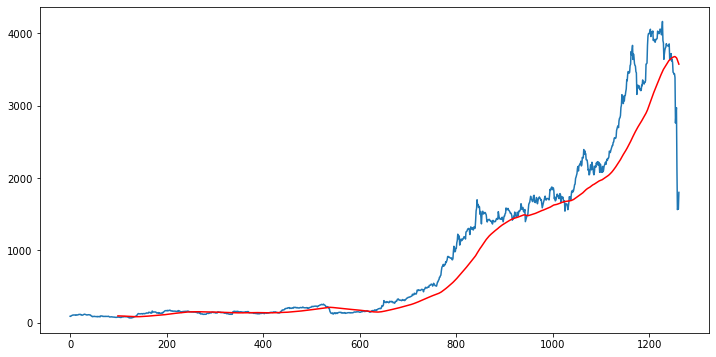

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [12]:
ma200 = df.Close.rolling(200).mean()
ma200

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
1257    3052.784504
1258    3049.441503
1259    3046.534003
1260    3043.477753
1261    3041.060753
Name: Close, Length: 1262, dtype: float64

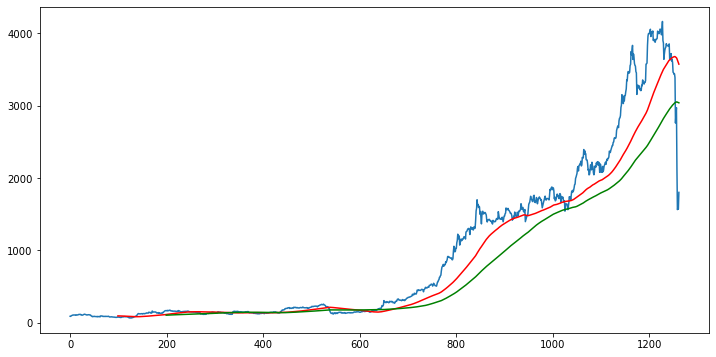

In [13]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [14]:
df.shape

(1262, 5)

In [15]:
#Splitting Data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(883, 1)
(379, 1)


In [16]:
data_training.head() 

,Close
0,90.480850
1,89.309311
2,96.011597
3,99.880394
4,105.247673


In [18]:
data_testing.head()

,Close
883,1438.199951
884,1442.800049
885,1429.550049
886,1432.349976
887,1536.650024


In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [20]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[1.41278675e-02],
       [1.34106926e-02],
       [1.75135945e-02],
       [1.98819352e-02],
       [2.31675933e-02],
       [2.42683705e-02],
       [2.40849060e-02],
       [2.50522580e-02],
       [2.60196099e-02],
       [2.54358650e-02],
       [2.48521154e-02],
       [2.36512692e-02],
       [2.69702836e-02],
       [2.38680900e-02],
       [2.53524695e-02],
       [2.50856143e-02],
       [2.69202445e-02],
       [2.72871733e-02],
       [3.02559371e-02],
       [2.99056911e-02],
       [2.92218725e-02],
       [2.98556566e-02],
       [3.01225118e-02],
       [2.45185475e-02],
       [2.52690787e-02],
       [2.38847681e-02],
       [2.43684394e-02],
       [2.69536055e-02],
       [2.88215920e-02],
       [3.12066108e-02],
       [3.19404639e-02],
       [3.03726889e-02],
       [2.80543827e-02],
       [2.64198904e-02],
       [2.47854027e-02],
       [2.45852602e-02],
       [2.65533203e-02],
       [2.69035663e-02],
       [2.73205297e-02],
       [2.78042056e-02],


In [21]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [22]:
x_train.shape

(783, 100, 1)

In [23]:
#ML Model

In [24]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [25]:
import numpy
print(numpy.__file__)


C:\ProgramData\Anaconda3\envs\Tenner\lib\site-packages\numpy\__init__.py


In [26]:
"""
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
              input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model = Sequential()
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model = Sequential()
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model = Sequential()
model.add(LSTM(units = 120, activation = 'relu', return_sequences = True))
model.add(Dropout(0.5))

model.add(Dense(units = 1))
"""
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1))

In [203]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_16 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_17 (LSTM)              (None, 100, 60)           26640     
                                                                 
 dropout_17 (Dropout)        (None, 100, 60)           0         
                                                                 
 lstm_18 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_18 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_19 (LSTM)              (None, 120)             

In [27]:

model.compile(optimizer='adam',loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)


Epoch 1/50
25/25 [==============================] - 8s 108ms/step - loss: 0.0401
Epoch 2/50
25/25 [==============================] - 3s 105ms/step - loss: 0.0089
Epoch 3/50
25/25 [==============================] - 3s 106ms/step - loss: 0.0070
Epoch 4/50
25/25 [==============================] - 3s 105ms/step - loss: 0.0049
Epoch 5/50
25/25 [==============================] - 3s 114ms/step - loss: 0.0036
Epoch 6/50
25/25 [==============================] - 3s 112ms/step - loss: 0.0035
Epoch 7/50
25/25 [==============================] - 3s 109ms/step - loss: 0.0045
Epoch 8/50
25/25 [==============================] - 3s 107ms/step - loss: 0.0033
Epoch 9/50
25/25 [==============================] - 3s 109ms/step - loss: 0.0032
Epoch 10/50
25/25 [==============================] - 3s 112ms/step - loss: 0.0048
Epoch 11/50
25/25 [==============================] - 3s 119ms/step - loss: 0.0041
Epoch 12/50
25/25 [==============================] - 3s 111ms/step - loss: 0.0031
Epoch 13/50
25/25 [======

In [28]:
model.save('adani.h5')

In [29]:
data_testing.head()

,Close
883,1438.199951
884,1442.800049
885,1429.550049
886,1432.349976
887,1536.650024


In [30]:
past_100_days = data_training.tail(100)

In [31]:
final_df = past_100_days.append(data_testing,ignore_index = True)

C:\Users\Owner\AppData\Local\Temp\ipykernel_16628\1195911748.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing,ignore_index = True)


In [32]:
final_df.head()

,Close
0,918.400024
1,909.900024
2,910.200012
3,905.200012
4,898.150024


In [33]:
input_data = scaler.fit_transform(final_df)
input_data

array([[1.43735416e-02],
       [1.17932879e-02],
       [1.18843520e-02],
       [1.03665558e-02],
       [8.22646676e-03],
       [6.99703698e-03],
       [7.63452252e-03],
       [8.12020991e-03],
       [8.65154976e-04],
       [0.00000000e+00],
       [5.64621315e-03],
       [3.64271099e-02],
       [5.68718364e-02],
       [4.68695369e-02],
       [3.35432970e-02],
       [3.55923219e-02],
       [4.87212780e-02],
       [4.85998469e-02],
       [7.16855055e-02],
       [8.11110350e-02],
       [1.07566231e-01],
       [8.93982173e-02],
       [8.84723468e-02],
       [1.00280809e-01],
       [6.17287844e-02],
       [7.14274876e-02],
       [7.85914784e-02],
       [8.74098894e-02],
       [8.05342650e-02],
       [8.24770516e-02],
       [8.70456331e-02],
       [8.69848991e-02],
       [9.17659572e-02],
       [9.71693267e-02],
       [9.53631269e-02],
       [9.44828347e-02],
       [8.73188068e-02],
       [1.16718550e-01],
       [1.18828272e-01],
       [1.20346068e-01],


In [34]:
input_data.shape

(479, 1)

In [35]:
x_test =[]
y_test =[]

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [36]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(379, 100, 1)
(379,)


In [37]:
#Making Predictions

y_predicted = model.predict(x_test)


12/12 [==============================] - 1s 32ms/step


In [38]:
y_predicted.shape

(379, 1)

(605, 100)

(605, 1)

In [39]:
y_test

array([0.17216362, 0.17356002, 0.16953786, 0.1703878 , 0.20204905,
       0.18892011, 0.17468317, 0.17181455, 0.17359037, 0.17179936,
       0.16970479, 0.17321092, 0.17878122, 0.16970479, 0.15956591,
       0.17204222, 0.18344085, 0.18354709, 0.19276014, 0.19594751,
       0.21751538, 0.21071564, 0.21233971, 0.21082192, 0.21581545,
       0.20856038, 0.20790772, 0.20458376, 0.20077408, 0.19493056,
       0.1960234 , 0.19189497, 0.1849283 , 0.16628975, 0.17315018,
       0.17202703, 0.18313729, 0.17929726, 0.20040982, 0.18706841,
       0.18656753, 0.18124005, 0.17838658, 0.19901345, 0.19931701,
       0.18471582, 0.19722245, 0.20546409, 0.20299007, 0.20745238,
       0.21208166, 0.23534948, 0.22598469, 0.21200577, 0.21815284,
       0.21977691, 0.20397664, 0.20069819, 0.20423466, 0.21112548,
       0.16012752, 0.16773166, 0.17431892, 0.1826668 , 0.18664342,
       0.18772103, 0.21164151, 0.23204068, 0.23823329, 0.24098052,
       0.25321394, 0.26667682, 0.25515672, 0.25359339, 0.24822

In [40]:
y_predicted

array([[0.19156334],
       [0.19075355],
       [0.19007972],
       [0.18954958],
       [0.18916121],
       [0.1889517 ],
       [0.18893954],
       [0.18910463],
       [0.189406  ],
       [0.1897997 ],
       [0.1902428 ],
       [0.19069585],
       [0.19113289],
       [0.19154721],
       [0.1919253 ],
       [0.19223751],
       [0.19247743],
       [0.1926682 ],
       [0.19284159],
       [0.19304258],
       [0.1933155 ],
       [0.193732  ],
       [0.1943454 ],
       [0.19518535],
       [0.19625443],
       [0.19754389],
       [0.19902197],
       [0.20064333],
       [0.20235285],
       [0.20408712],
       [0.20577464],
       [0.20735526],
       [0.20877689],
       [0.20998977],
       [0.21092337],
       [0.21153711],
       [0.21181467],
       [0.21178366],
       [0.21148655],
       [0.21101356],
       [0.21043631],
       [0.209809  ],
       [0.2091617 ],
       [0.20850632],
       [0.20788392],
       [0.20733935],
       [0.2068817 ],
       [0.206

In [41]:
scaler.scale_

array([0.00030356])

In [42]:
scale_factor = 1/0.00794171
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

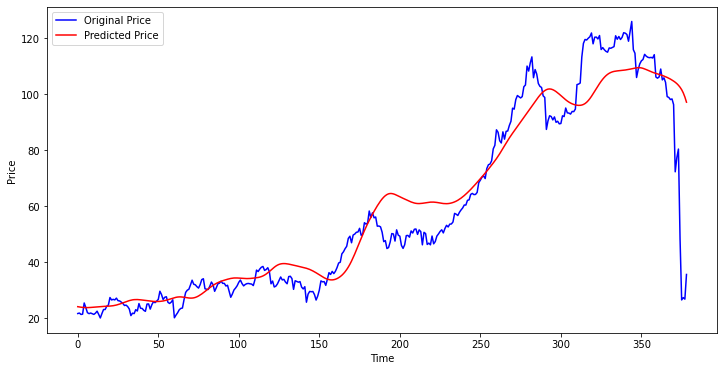

In [43]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [224]:
import tensorflow as tf
print(tf.__version__)

2.11.0
